<a href="https://colab.research.google.com/github/priyanu17/case_studies/blob/master/CS_4_Insurance_Premiums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regression 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# load data

insurance_data = pd.read_csv("CS_4_Insurance_Premiums.csv")

In [5]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# shape of data
insurance_data.shape

(1338, 7)

In [7]:
# columns in data
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Target Variable -- "Charges"
insurance_data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [10]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# number of unique values

insurance_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [15]:
# check for null values 
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
sns.set_color_codes(palette = "bright")
sns.set(context = 'talk', style = 'dark', palette= 'husl', color_codes=True)

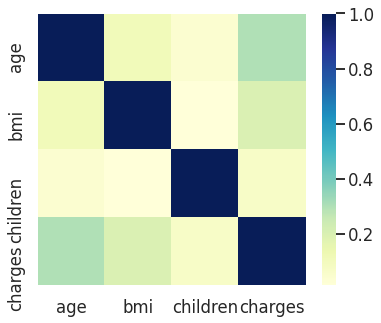

In [17]:
# Correlation matrix

plt.figure(figsize = (6, 5))
sns.heatmap(insurance_data.corr(),cmap="YlGnBu")
plt.show()

In [18]:
# No high correlations

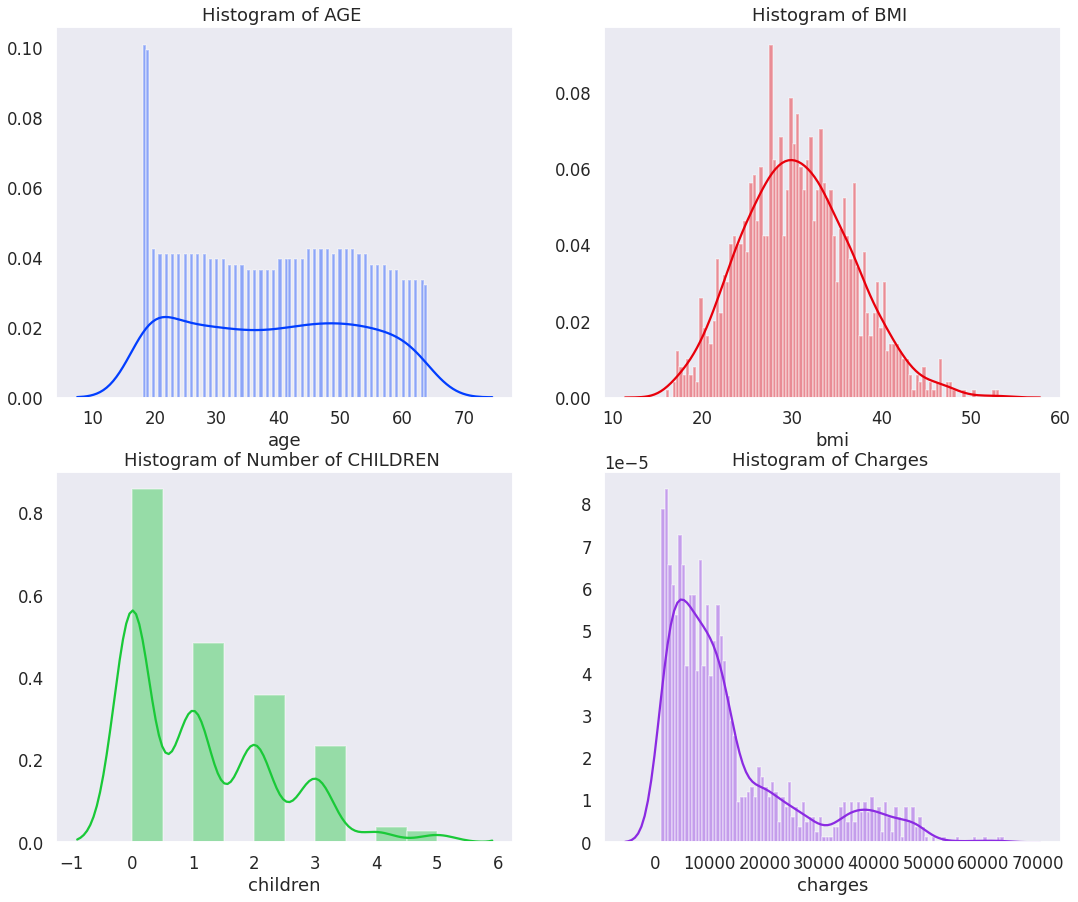

In [19]:
# Histogram plots of numeric columns

fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize = (18, 15))

sns.distplot(insurance_data["age"], bins = 90, hist = True, kde = True, color = 'b', ax = axes[0][0])
axes[0][0].title.set_text("Histogram of AGE ")

sns.distplot(insurance_data["bmi"], bins = 100, hist = True, kde = True, color = 'r', ax = axes[0][1])
axes[0][1].title.set_text("Histogram of BMI ")

sns.distplot(insurance_data["children"], bins = 10, hist = True, kde = True, color = 'g', ax = axes[1][0])
axes[1][0].title.set_text("Histogram of Number of CHILDREN ")

sns.distplot(insurance_data["charges"], bins = 100, hist = True, kde = True, color = 'm', ax = axes[1][1])
axes[1][1].title.set_text("Histogram of Charges ")

plt.show()

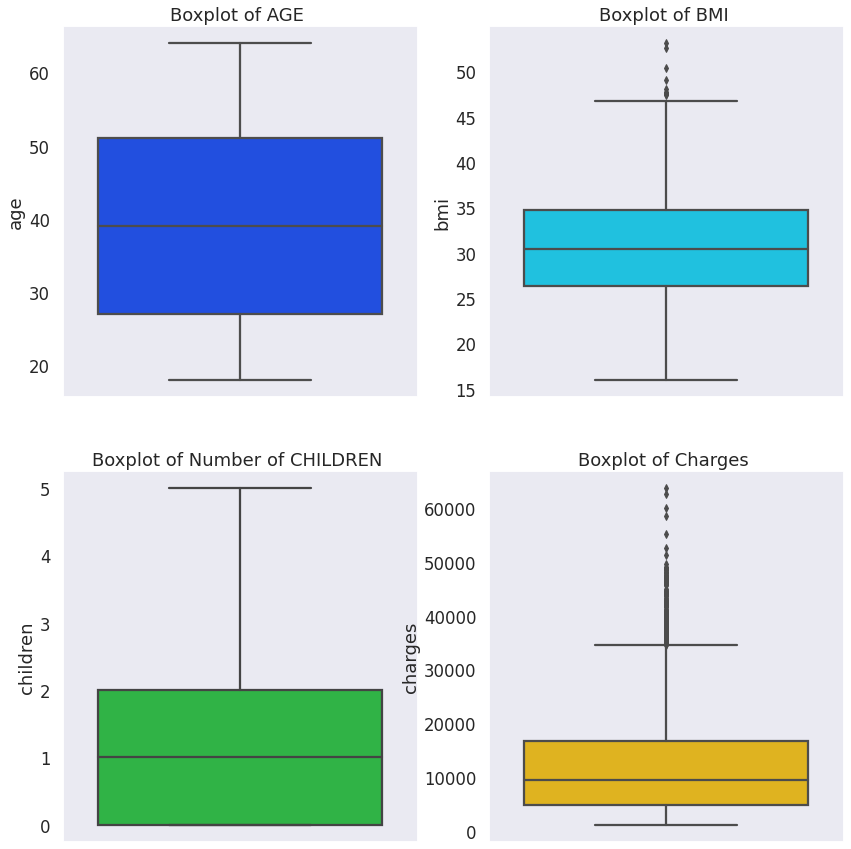

In [20]:
# Boxplots plots of numeric columns

fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize = (14, 15))

sns.boxplot(y = insurance_data["age"], color = 'b', ax = axes[0][0])
axes[0][0].title.set_text("Boxplot of AGE ")

sns.boxplot(y = insurance_data["bmi"], color = 'c', ax = axes[0][1])
axes[0][1].title.set_text("Boxplot of BMI ")

sns.boxplot(y = insurance_data["children"], color = 'g', ax = axes[1][0])
axes[1][0].title.set_text("Boxplot of Number of CHILDREN ")

sns.boxplot(y = insurance_data["charges"], color = 'y', ax = axes[1][1])
axes[1][1].title.set_text("Boxplot of Charges ")

plt.show()

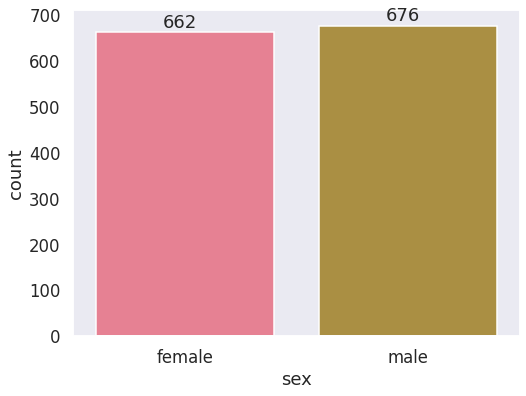

In [21]:
# plot : value_counts("sex")

plt.figure( figsize = (8, 6))
ax = sns.countplot(x = 'sex', data = insurance_data)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

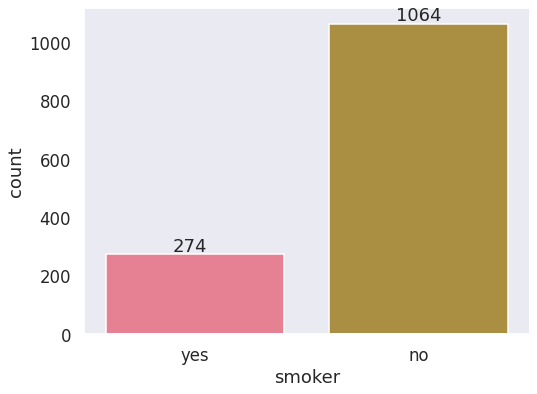

In [22]:
# plot : value_counts("smoker")

plt.figure( figsize = (8, 6))
ax = sns.countplot(x = 'smoker', data = insurance_data)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

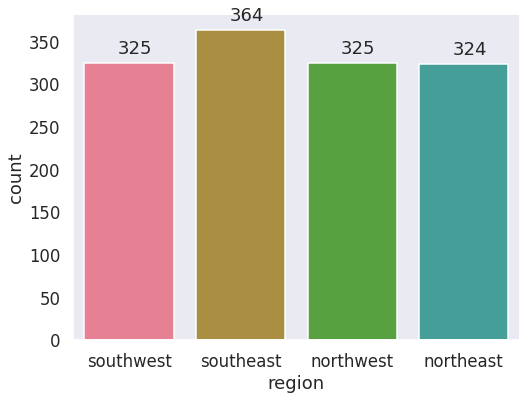

In [23]:
# plot : value_counts("region")

plt.figure( figsize = (8, 6))
ax = sns.countplot(x = 'region', data = insurance_data)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

In [24]:
# Bivariate Analysis

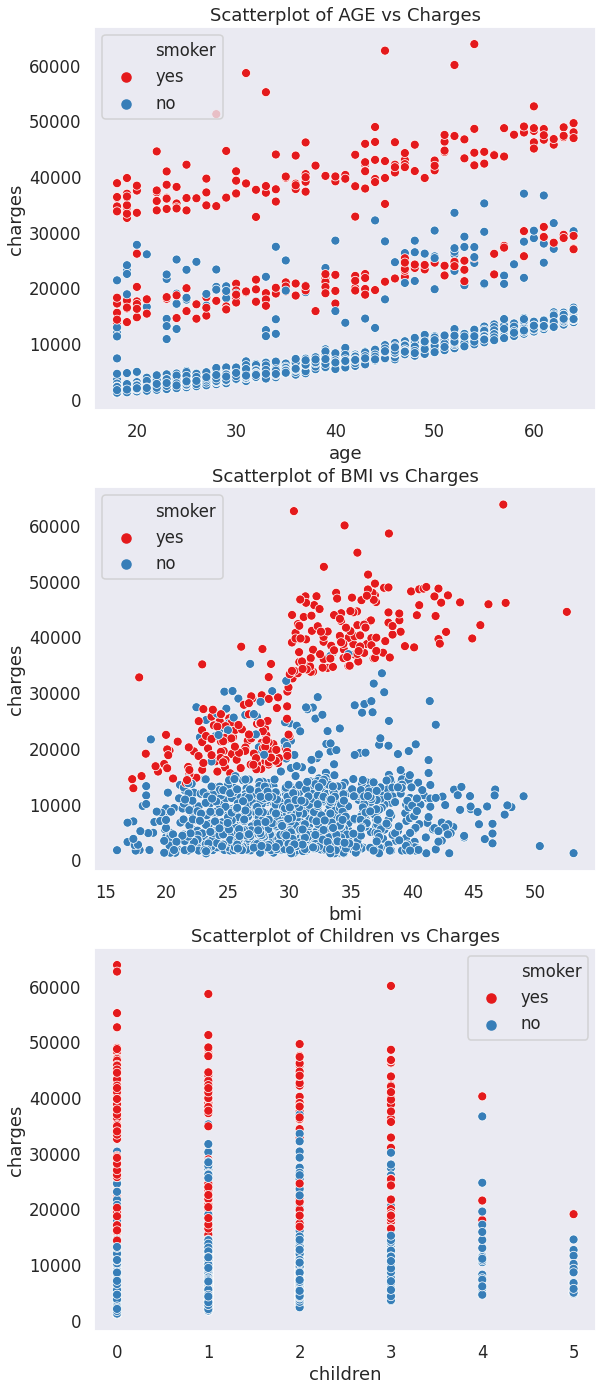

In [25]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (9, 24))

sns.scatterplot( x = "age", y = "charges", data = insurance_data, hue = 'smoker',palette="Set1", ax = axes[0] )
axes[0].title.set_text("Scatterplot of AGE vs Charges")

sns.scatterplot( x = "bmi", y = "charges", data = insurance_data, hue = 'smoker',palette="Set1", ax = axes[1])
axes[1].title.set_text("Scatterplot of BMI vs Charges")

sns.scatterplot( x = "children", y = "charges", data = insurance_data, hue = 'smoker',palette="Set1", ax = axes[2])
axes[2].title.set_text("Scatterplot of Children vs Charges")



In [26]:
# people with higher age and who smoke pay higher insurance
# people with higher bmi and who smoke pay higher insurance
# In general people who skoke pay higher insurance premium

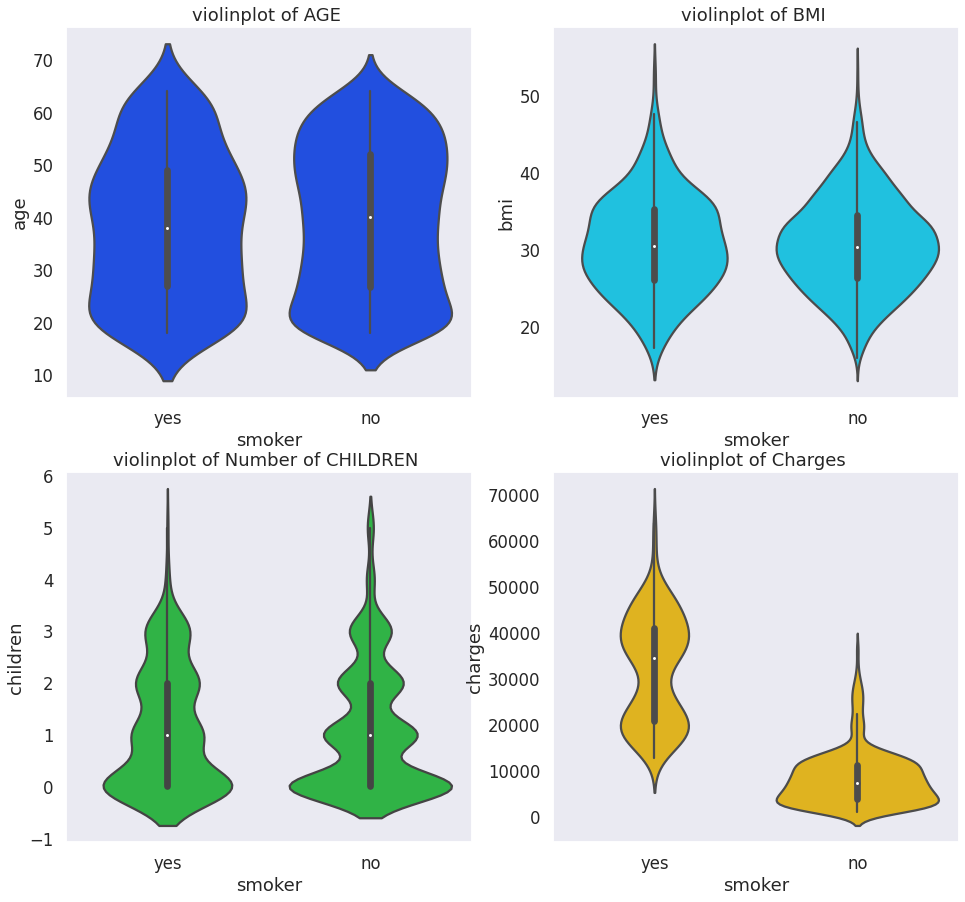

In [27]:
# Boxplots plots of numeric columns

fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize = (16, 15))

sns.violinplot(x = insurance_data["smoker"], y = insurance_data["age"], color = 'b', ax = axes[0][0])
axes[0][0].title.set_text("violinplot of AGE ")

sns.violinplot(x = insurance_data["smoker"],y = insurance_data["bmi"], color = 'c', ax = axes[0][1])
axes[0][1].title.set_text("violinplot of BMI ")

sns.violinplot(x = insurance_data["smoker"],y = insurance_data["children"], color = 'g', ax = axes[1][0])
axes[1][0].title.set_text("violinplot of Number of CHILDREN ")

sns.violinplot(x = insurance_data["smoker"],y = insurance_data["charges"], color = 'y', ax = axes[1][1])
axes[1][1].title.set_text("violinplot of Charges ")

plt.show()

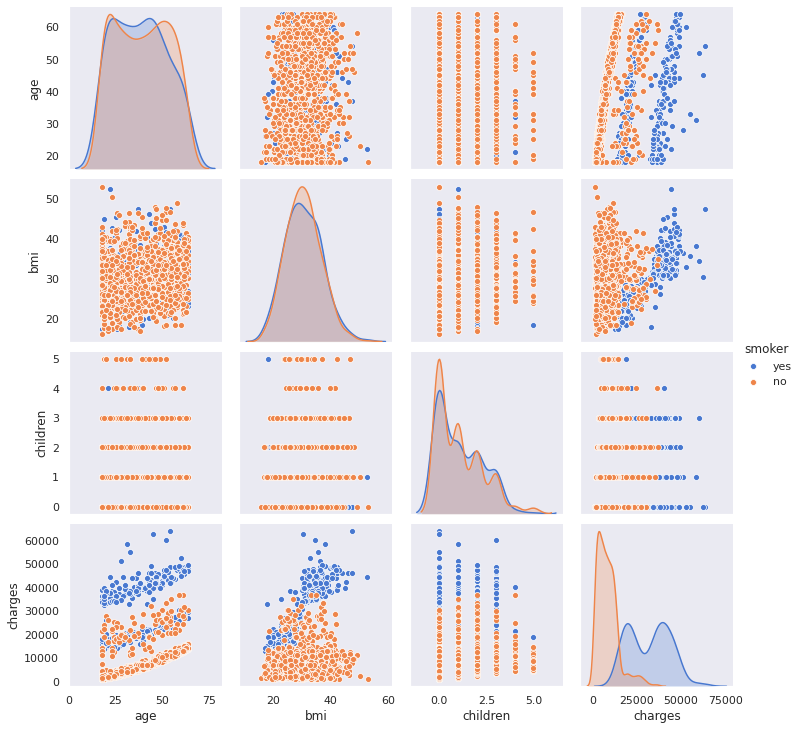

In [28]:
sns.set_context("notebook")
sns.set_palette("muted")
sns.pairplot(insurance_data, hue= 'smoker')

In [29]:
# Data Preparation

In [30]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# dropping regions column
insurance_data = insurance_data.drop(columns = ["region"])

In [32]:
insurance_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [33]:
# Label Encoding

insurance_data["sex"] = insurance_data["sex"].map(lambda s : 1 if s == 'female' else 0)
insurance_data["smoker"] = insurance_data["smoker"].map(lambda s : 1 if s == 'yes' else 0)


In [34]:
insurance_data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [35]:
# No One hot encoding required

In [36]:
insurance_data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [37]:
# Create X and y parameters

X = insurance_data.drop(columns = ["charges"]).values
y = insurance_data["charges"].values

In [41]:
# split data into train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3)

In [42]:
len(X_train)

936

In [43]:
len(X_test)

402

In [44]:
# Model 1 : Multiple Linear Regression (without feature scaling)

from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept= False)

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [45]:
y_pred_lr = lr.predict(X_test)

In [46]:
# R2 Score for Linear Regression 
#(higher and closer to 1 is desired)

lr_score = lr.score(X_test, y_test)
print(lr_score)

0.7267262760872997


In [47]:
lr_result = pd.DataFrame({ "Actual Value" : y_test, "Predicted Value" : y_pred_lr})
lr_result.head(10)

,Actual Value,Predicted Value
0,58571.07448,29536.882487
1,1972.95000,5918.359903
2,2128.43105,4153.053289
3,11286.53870,11194.251231
4,6272.47720,9302.198270
5,6666.24300,9619.332426
6,10702.64240,10829.220024
7,11946.62590,13119.077840
8,1725.55230,5343.158488
9,8277.52300,9775.713756


In [48]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
# scaled values
pd.DataFrame(X_train).head(10)

,0,1,2,3,4
0,1.655367,0.991489,1.047734,-0.093200,-0.508001
1,-0.425745,-1.008584,-0.046112,-0.916171,-0.508001
2,-0.856320,0.991489,-2.080731,0.729771,1.968502
3,-0.999845,-1.008584,0.518187,2.375714,-0.508001
4,0.291880,0.991489,-0.602963,-0.916171,1.968502
5,-0.928082,-1.008584,0.809438,-0.916171,-0.508001
6,-1.502182,-1.008584,-2.190777,0.729771,1.968502
7,-0.569270,0.991489,-0.236418,-0.916171,-0.508001
8,-1.502182,0.991489,-0.068452,-0.916171,-0.508001
9,-0.497507,-1.008584,-0.445754,-0.093200,-0.508001


In [50]:
# Model 2 : Multiple Linear Regression (with feature scaling)

from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression()

multiple_linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# Model 3 : Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree = 4)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

polynomial_reg = LinearRegression(fit_intercept= False)
polynomial_reg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [52]:
# Model 4 : Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth = 5, random_state = 10)

decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [53]:
# Model 5 : Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 500, max_depth = 5, random_state = 10)

random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [54]:
# Model 5 : Support Vector Regressor

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(random_state = 10)

svm_reg.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=10, tol=0.0001, verbose=0)

In [55]:
# Model 6 : Stochastic Gradient Descent Regressor

from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import Nystroem

feature_map_nystroem = Nystroem(gamma=.2,
                                 random_state=1,
                                 n_components=300)
X_train_transformed = feature_map_nystroem.fit_transform(X_train.copy())
X_test_transformed = feature_map_nystroem.transform(X_test.copy())

sgd_regressor = SGDRegressor(random_state = 10)
sgd_regressor.fit(X_train_transformed, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=10,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [56]:
# Evaluate model outcomes and scores 

In [57]:
def evaluate_model_outcomes(regressor, regressor_name, X_train, X_test, y_train, y_test):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from math import sqrt

    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)

    print("Model Outcomes for ", regressor_name,"Regression", "are as follows :- \n")

    # training score 
    r2_score_train = r2_score(y_train, y_pred_train)
    print("R2 Score for" , regressor_name, "on the train set is :", r2_score_train , "\n")

    # test score
    r2_score_test = r2_score(y_test, y_pred_test )
    print("R2 Score for" , regressor_name, "on the test set is :", r2_score_test , "\n")

    # RMSE for the train set 
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    print("Root Mean Squared Error for", regressor_name, "on the train set is : ", rmse_train, "\n")

    # RMSE for the test set
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    print("Root Mean Squared Error for", regressor_name , "on the test set is : ", rmse_test, "\n")

    return r2_score_train, r2_score_test, rmse_train, rmse_test


In [58]:
# Evaluate Model 2 : multiple linear regression (with scaling)
r2_score_train_MLR, r2_score_test_MLR, rmse_train_MLR, rmse_test_MLR = evaluate_model_outcomes( multiple_linear_reg,
                                                                               "Multiple Linear ",
                                                                               X_train, X_test,
                                                                               y_train, y_test)

Model Outcomes for  Multiple Linear  Regression are as follows :- 

R2 Score for Multiple Linear  on the train set is : 0.7428601969105277 

R2 Score for Multiple Linear  on the test set is : 0.7603392279704198 

Root Mean Squared Error for Multiple Linear  on the train set is :  5973.537094165466 

Root Mean Squared Error for Multiple Linear  on the test set is :  6276.776373571013 



In [59]:
# Evaluate Model 3 : polynomial regression
r2_score_train_PR, r2_score_test_PR, rmse_train_PR, rmse_test_PR = evaluate_model_outcomes(polynomial_reg,
                                                                                         "Polynomial", 
                                                                                         X_train_poly,
                                                                                         X_test_poly, 
                                                                                         y_train, y_test)

Model Outcomes for  Polynomial Regression are as follows :- 

R2 Score for Polynomial on the train set is : 0.8555616842453931 

R2 Score for Polynomial on the test set is : 0.8245606774664832 

Root Mean Squared Error for Polynomial on the train set is :  4477.010564628761 

Root Mean Squared Error for Polynomial on the test set is :  5370.3383654605495 



In [60]:
# Evaluate Model 4 : decision tree regression
r2_score_train_DT, r2_score_test_DT, rmse_train_DT, rmse_test_DT = evaluate_model_outcomes(decision_tree_reg, 
                                                                                           "Decision Tree ",  
                                                                                           X_train, X_test, 
                                                                                           y_train, y_test)

Model Outcomes for  Decision Tree  Regression are as follows :- 

R2 Score for Decision Tree  on the train set is : 0.8760031616922127 

R2 Score for Decision Tree  on the test set is : 0.8632666028356065 

Root Mean Squared Error for Decision Tree  on the train set is :  4148.128650618225 

Root Mean Squared Error for Decision Tree  on the test set is :  4741.0603227625425 



In [61]:
# Evaluate MOdel 5 : random forest regression
r2_score_train_RF, r2_score_test_RF, rmse_train_RF, rmse_test_RF = evaluate_model_outcomes(random_forest_reg,
                                                                                           "Random Forest ", 
                                                                                           X_train, X_test, 
                                                                                           y_train, y_test)

Model Outcomes for  Random Forest  Regression are as follows :- 

R2 Score for Random Forest  on the train set is : 0.8863586282370772 

R2 Score for Random Forest  on the test set is : 0.8717543966578016 

Root Mean Squared Error for Random Forest  on the train set is :  3971.139515484334 

Root Mean Squared Error for Random Forest  on the test set is :  4591.551095738712 



In [62]:
# Evaluate Model 6 : support vector regressor
r2_score_train_SVM , r2_score_test_SVM, rmse_train_SVM, rmse_test_SVM = evaluate_model_outcomes(svm_reg,
                                                                                                "Support Vector ", 
                                                                                                X_train, X_test, 
                                                                                                y_train, y_test)

Model Outcomes for  Support Vector  Regression are as follows :- 

R2 Score for Support Vector  on the train set is : -1.064545542746124 

R2 Score for Support Vector  on the test set is : -0.9894815371365684 

Root Mean Squared Error for Support Vector  on the train set is :  16926.187411883515 

Root Mean Squared Error for Support Vector  on the test set is :  18084.567864235156 



In [63]:
# Evaluate Model 7 : stocastic gradient regressor
r2_score_train_SGD, r2_score_test_SGD, rmse_train_SGD, rmse_test_SGD = evaluate_model_outcomes(sgd_regressor,
                                                                                               "Stocastic Gradient",
                                                                                               X_train_transformed,
                                                                                               X_test_transformed,
                                                                                               y_train,y_test)

Model Outcomes for  Stocastic Gradient Regression are as follows :- 

R2 Score for Stocastic Gradient on the train set is : 0.8508772489635131 

R2 Score for Stocastic Gradient on the test set is : 0.8368388628457137 

Root Mean Squared Error for Stocastic Gradient on the train set is :  4549.030670071411 

Root Mean Squared Error for Stocastic Gradient on the test set is :  5179.007510228532 



In [64]:
r2_score_train_all=[r2_score_train_MLR, r2_score_train_PR, r2_score_train_DT,
                    r2_score_train_RF, r2_score_train_SVM, r2_score_train_SGD]

r2_score_test_all=[r2_score_test_MLR,r2_score_test_PR, r2_score_test_DT,
                   r2_score_test_RF, r2_score_test_SVM, r2_score_test_SGD]

rmse_train_all = [rmse_train_MLR, rmse_train_PR, rmse_train_DT, 
                  rmse_train_RF, rmse_train_SVM, rmse_train_SGD]
                  
rmse_test_all = [rmse_test_MLR, rmse_test_PR, rmse_test_DT,
                 rmse_test_RF, rmse_test_SVM, rmse_test_SGD]

In [65]:
models = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression",
          "Random Forest", "Support Vector Regression", "Stocastic Gradient Regression"]



result_dataframe = pd.DataFrame({"R2 Score Train" : r2_score_train_all,
                                 "R2 Score Test" : r2_score_test_all,
                                 "RMSE Train" : rmse_train_all,
                                 "RMSE Test" : rmse_test_all},
                                index = models)
result_dataframe.round(3)

,R2 Score Train,R2 Score Test,RMSE Train,RMSE Test
Multiple Linear Regression,0.743,0.760,5973.537,6276.776
Polynomial Regression,0.856,0.825,4477.011,5370.338
Decision Tree Regression,0.876,0.863,4148.129,4741.060
Random Forest,0.886,0.872,3971.140,4591.551
Support Vector Regression,-1.065,-0.989,16926.187,18084.568
Stocastic Gradient Regression,0.851,0.837,4549.031,5179.008


In [66]:
# Best Results obtained for : Random Forest Regressor

In [68]:
# Testing The best regressor with new data: (single row)

input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [69]:
# Our simple pre-processing 
input_data.drop(["region"], axis=1, inplace=True) 
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [70]:
# Scale our input data  
input_data = sc.transform(input_data)
input_data

array([[-0.28221974, -1.00858385, -0.7494163 , -0.9161708 , -0.50800051]])

In [71]:
input_data.shape

(1, 5)

In [72]:
# Reshape our input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-0.28221974, -1.00858385, -0.7494163 , -0.9161708 , -0.50800051]])

In [73]:
# Get our predicted insurance rate for our new customer
random_forest_reg.predict(input_data)

array([5348.79559673])

In [74]:
# Standard scaler parameters
print(sc.mean_)
print(sc.scale_)

[38.93269231  0.5042735  30.5286485   1.11324786  0.20512821]
[13.93485912  0.49998174  6.04290096  1.21510953  0.40379528]


In [75]:
# Done